# Computational Social Science Project #3 

**Enter your Name:**Nereida Heller

*Semester:* Fall 2024

I have very little sense of what these numbers mean and I'm not used to operating without understanding where data comes from or at the very least what exactly each variable is capturing. In particular, feature selection seems nearly impossible without that. In real ML world, they think about that stuff, I hope? We're just eschewing it in class bc the we're worried about learning the methods and we're not concerned with the substance of the policy recs, right?

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score


# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag',
                                                'APPLICATION_TYPE'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

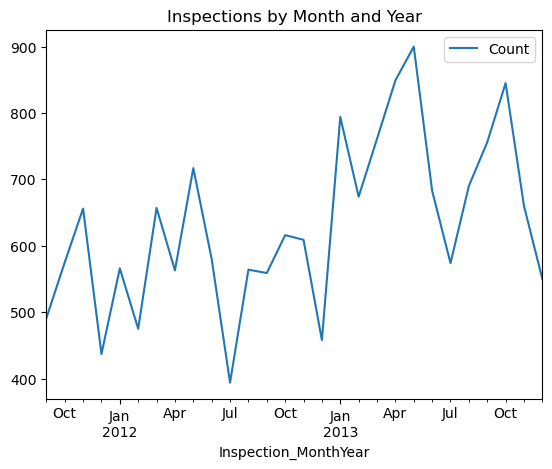

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year"); 

Let's visualize what the distribution of results looks like.

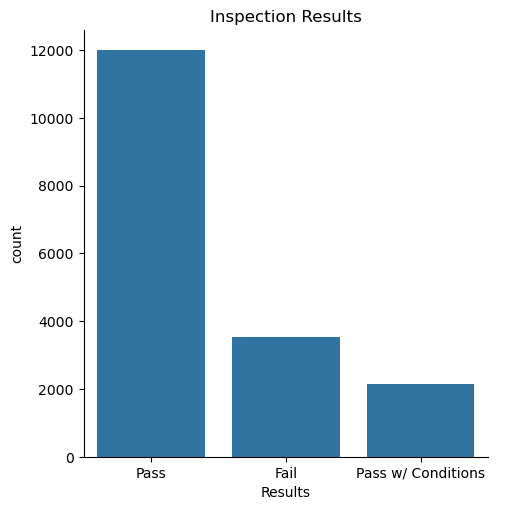

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

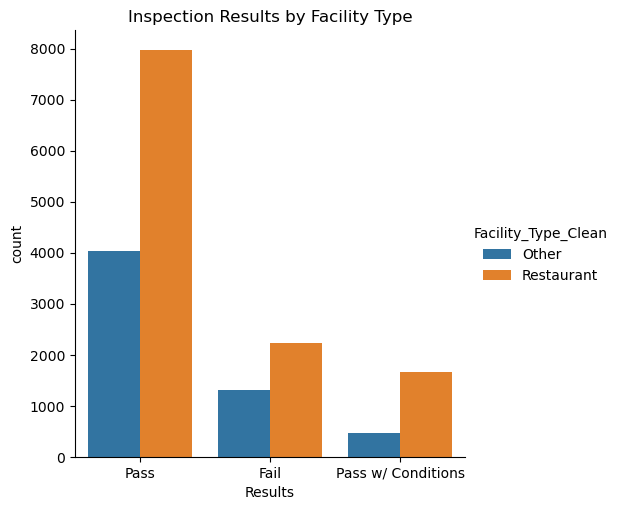

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']
# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True


In [13]:
#X.to_csv("X.csv", index=False)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

This is a large dataset, with over 15,000 rows and about 40 features. 

I’m thinking of running the following models: 
1. Logistic Regression. Picking this because I’m most familiar with it. I don’t know if the underlying distribution of the result variable is linear, but I figure I might as well see how the logistic regression fits. If I remember correctly, logistic regression is well-suited to binary outcomes, as well. 

2. Random Forests. These models build multiple decision trees, each trained on a randomly sampled subset of the data and I think also a subset of features? The model predicts the outcome averaged across trees to reduce overfitting. There are a lot of features and a lot of observations, so I’m thinking RF will do well with this complex set. RF also has built-in penalties for overfitting which is going to be a problem with all of these features

3. 
XGBoost: Gradient Boosting builds decision trees one at a time, with each new tree focused on correcting the mistakes made by the previous ones. The model continues adding trees until it can’t improve significantly. XGBoost is a faster version of this approach. As the model focuses on cases that other trees have misclassified it improves. This results in high accuracy. I’m thinking of using this for the same reasons as RF: complexity and overfitting penalties.

### Model 1: OLS

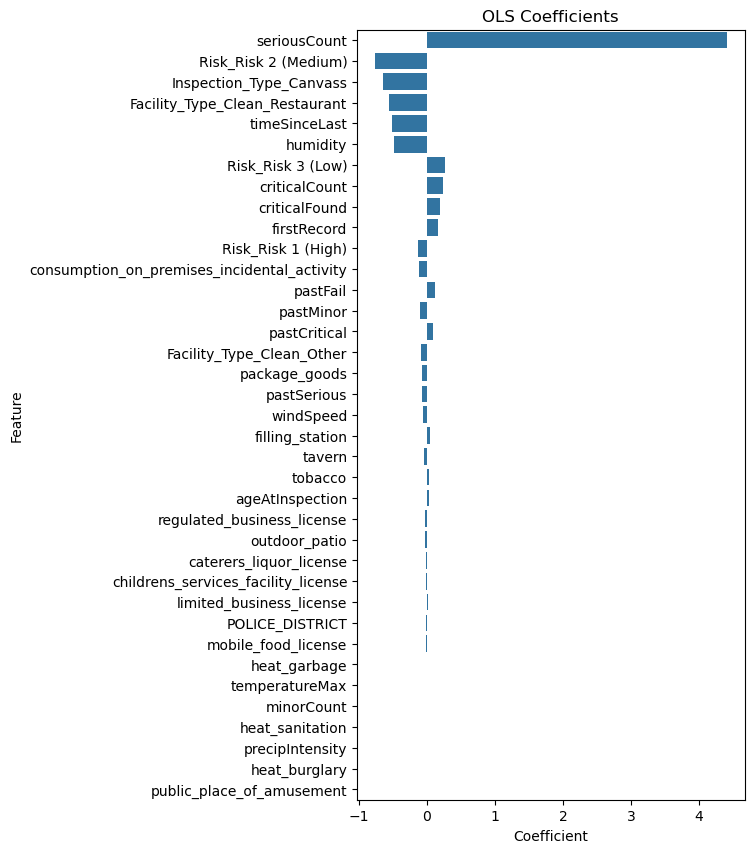

0.9170528844195687


In [14]:
# create a model -- not tuning yet
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X, y)

# taking a look
# dataframe
log_reg_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_.flatten()
})

#plot
#lin_reg_data = lin_reg_data.sort_values(by='Coefficient', ascending=False)
log_reg_data = log_reg_data.reindex(log_reg_data['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(5, 10))

log_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=log_reg_data)                         

log_reg_plot.set_title("OLS Coefficients") 
#plt.xlim(-.006,.01)
plt.show() 
#coefficients
log_reg_data

# specify cross-validation
scores = cross_val_score(log_reg, 
                         X, 
                         y,
                         cv=5)

# calculate the average score across models
print(scores.mean())


#### Tuning OLS

In [15]:
# GridSearchCV
#Hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}          

# grid search
log_grid_reg = GridSearchCV(estimator  = log_reg,      
                            param_grid = param_grid,   
                            cv=3)                      

# fit the tuning
log_grid_reg.fit(X, y)

# selection
best_index = np.argmax(log_grid_reg.cv_results_["mean_test_score"])  
best_log_pred = log_grid_reg.best_estimator_.predict(X)   

# Root mean squared error
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

# printing
print(log_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"])) #didn't want to run this one
print('Validation R^2:', log_grid_reg.score(X, y))
print('Validation RMSE', rmse(best_log_pred, y))

{'fit_intercept': True}
Best CV R^2: 0.9130691199124575
Validation R^2: 0.9188165371301679
Validation RMSE 0.57946087821344


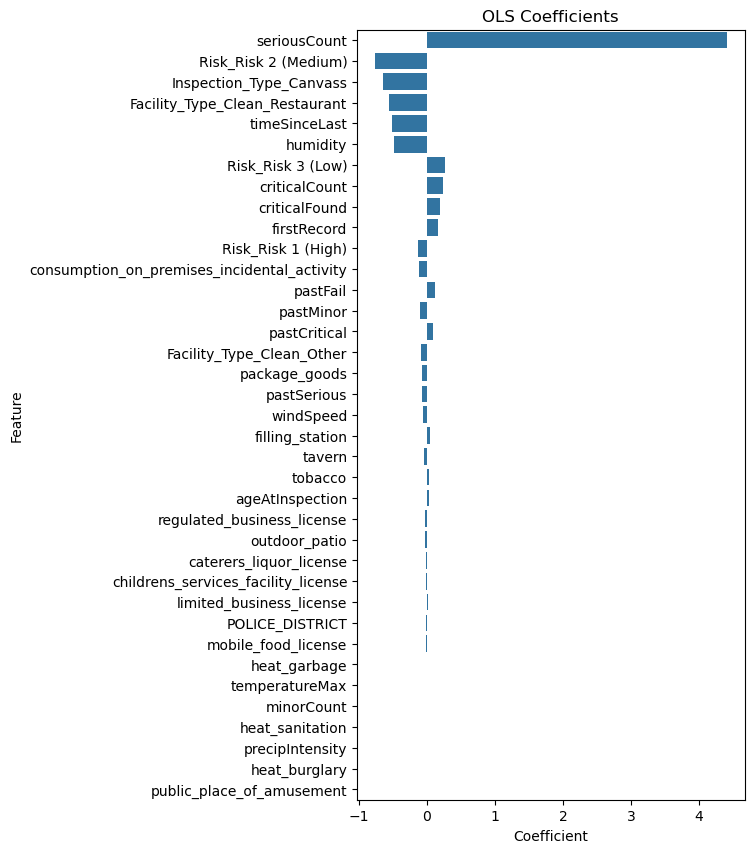

0.9170528844195687


In [16]:
# running again incorporating tuning advice (score is exactly the same)
log_reg = LogisticRegression(fit_intercept = True)

# fit the model
log_model = log_reg.fit(X, y)

# taking a look
# dataframe
log_reg_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_.flatten()})

#plot
log_reg_data = log_reg_data.reindex(log_reg_data['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(5, 10))

log_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=log_reg_data)                         

log_reg_plot.set_title("OLS Coefficients") 
#plt.xlim(-.006,.01)
plt.show() 
#coefficients
log_reg_data

# specify cross-validation
scores = cross_val_score(log_reg, 
                         X, 
                         y,
                         cv=5)

# calculate the average score across models
print(scores.mean())

###  Model 2: Random Forest

In [17]:
y.shape

(15311, 1)

In [18]:
# initialize a random forest classifier. using parameters from class as a starting point.
rf_classifier = RandomForestClassifier(
                       n_estimators=100,              # specify the number of trees (100 is default, a good starting point)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go (NH: none: can go as long as needs to)
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping -- how soon are you going to stop?
                       random_state = 10)             # random seed

# specify cross-validation
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Seems like .ravel this is necessary given the shape of our data
                         cv=5,
                        verbose=2)

[CV] END .................................................... total time=  12.2s
[CV] END .................................................... total time=  13.2s
[CV] END .................................................... total time=  13.4s
[CV] END .................................................... total time=  13.0s
[CV] END .................................................... total time=  13.4s


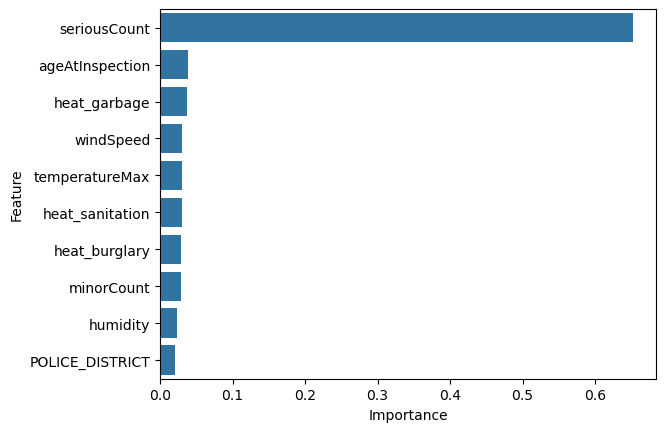

0.9220169388625923


In [19]:
# fit the random forest on data to get feature importance
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe NH: this is not to coming  score above
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

# calculate the average score across models
print(scores.mean())

In [20]:
#cross validation score is very high, I wonder 
print(scores.mean())

0.9220169388625923


#### Tuning RF

In [21]:
# Define the hyperparameter grid (essentially just putting in all of the ones from the example in class. 
# not sure if this is best practice. With all the hyperparameters and robust options, this code took a so long to run that it would time out. or at 
# least the little kernel circle would suddenly have a lightning bolt in it, which from googling appears to mean it's timed out. So I have a 
# kind of random subset)

param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees (exploring different values)
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees (None means no limit)
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'max_features': [2, 10],  # Number of features to consider at each split: sqrt, 2, 10, 20, 30
    'min_impurity_decrease': [0, .1] # Threshold for early stopping 0, .0001, .001, .1)
     }


# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)  # Use all available cores for parallel computation

# Fit GridSearchCV
grid_search.fit(X, y)

# Get the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test data
test_score = grid_search.score(X, y)
print("Test set score with best parameters:", test_score)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 10, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.926654132155712
Test set score with best parameters: 0.9551302984782183


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


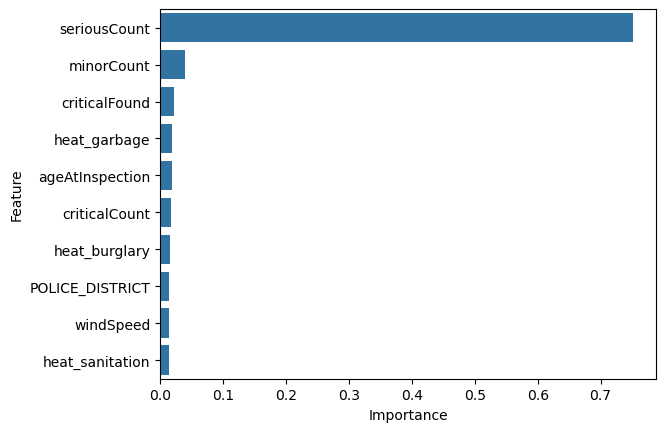

In [22]:
# refitting RF. slightly better. 
rf_classifier = RandomForestClassifier(
                       n_estimators=50,            # specify the number of trees (100 is default, a good starting point)
                       criterion='gini',           # or you can use 'entropy' for information gain
                       max_depth=10,               # how deep tree nodes can go (NH: none: can go as long as needs to)
                       min_samples_split=5,        # samples needed to split node
                       max_features=10,            # number of features to look for when splitting
                       min_impurity_decrease=0,    # early stopping -- how soon are you going to stop?
                       random_state = 10,
                       verbose=2)             

# specify cross-validation
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Seems like .ravel this is necessary given the shape of our data
                         cv=5)


# fit the random forest on data to get feature importance
# NH: now fitting on X to make prediction -- separate thing. the above only works in cross val score function
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe NH: this is not to coming  score above
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()


In [23]:
# calculate the average score across models
#0.9265234346095376
scores.mean()

0.9252825009654645

### Model 3: XGBoost

In [24]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)
    
    
# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score), # Measures the proportion of correct predictions out of the total number of predictions.
          'recall': make_scorer(recall_score), # false negatives
          'precision': make_scorer(precision_score),  # how often is model correct when it's predicting target class
          'f1': make_scorer(f1_score) # average between recall and precision
          }

    
# perform cross-validation with 5-fold and return the trained estimators. unlike cross_val_score, gives recall, precision, and f1 in addition to accuracy
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                                X,                     # specify features
                                y.ravel(),             # specify outcome, and use ravel
                                cv=5,                  # specify 5-fold cross validation
                                return_estimator=True, # return the estimators fitted at each split
                                scoring=scoring)       # which scoring metrics to return (the whole list in this case)
     
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        scores = cv_results[metric]
        print(f"{metric[5:]}: {scores.mean():.3f}")
    
# final fit
xgb_classifier.fit(X, y.ravel())



accuracy: 0.919
recall: 0.835
precision: 0.779
f1: 0.806


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

#### Tuning XGBoost

In [25]:
# Define the hyperparameter grid (essentially just putting in all of the ones from the example in class. 

#hyperparameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]}


# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, 
                           verbose = 2,
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5)

# Fit GridSearchCV
grid_search.fit(X, y)

# Get the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test data
test_score = grid_search.score(X, y)
print("Test set score with best parameters:", test_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.5; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.5; total time=   0.1s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.5; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.5; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.5; total time=   0.1s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.7; total time=   0.1s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END ........learning_rate=0.1, max_depth=3, subsample=1; total time=   0.0s
[CV] END ........learning_rate=0.1, max_depth=3

In [26]:
# adding the hyperparameters helps
# ----------
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    max_depth=5,             # Maximum tree depth
    learning_rate=0.1,       # Step size shrinkage
    objective='binary:logistic',  # For binary classification
    random_state=10,         # Ensures reproducibility
    subsample=1)

# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score), # Measures the proportion of correct predictions out of the total number of predictions.
          'recall': make_scorer(recall_score), # false negatives
          'precision': make_scorer(precision_score),  # how often is model correct when it's predicting target class
          'f1': make_scorer(f1_score) # average between recall and precision
          }

    
# perform cross-validation with 5-fold and return the trained estimators. unlike cross_val_score, gives recall, precision, and f1 in addition to accuracy
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                                X,                     # specify features
                                y.ravel(),             # specify outcome, and use ravel
                                cv=5,                  # specify 5-fold cross validation
                                return_estimator=True, # return the estimators fitted at each split
                                scoring=scoring)       # which scoring metrics to return (the whole list in this case)
     
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        scores = cv_results[metric]
        print(f"{metric[5:]}: {scores.mean():.3f}")
    
# final fit
xgb_classifier.fit(X, y.ravel())

accuracy: 0.925
recall: 0.883
precision: 0.775
f1: 0.825


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [27]:
# specify cross-validation
scores = cross_val_score(xgb_classifier, 
                         X, 
                         y.ravel(), # Seems like .ravel this is necessary given the shape of our data
                         cv=5,
                        verbose=2)

# calculate the average score across models
print(scores.mean())

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
0.9246947351855324


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

How well did your model do? 

Report accuracy, recall, precision, F1 score. 

Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why

Accuracy measures the proportion of correct predictions (true positives + true negatives) among all predictions. Might not be great for this data since it's highly imbalanced.

Precision measures how many positive predictions are actually correct (focuses on the correctness of positive predictions).

Recall, or sensitivity, measures how many actual positives are correctly predicted (focuses on finding all true positives). Going to be important here bc we're don't want to poison people by accident.

The F1 Score is a harmonic mean of precision and recall, providing a balanced metric when you seek a trade-off?

In [28]:
# Dictionary of models
models = {
    "XGBoost Classifier": xgb_classifier,
    "Random Forest Classifier": rf_classifier,
    "Logistic Regression": log_reg,
}

# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),  # Adjust for multi-class
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        print(f"  {metric_name.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")
    print("-" * 40)

Evaluating XGBoost Classifier
  Accuracy: 0.925 ± 0.004
  Precision: 0.873 ± 0.007
  Recall: 0.909 ± 0.012
  F1: 0.889 ± 0.006
----------------------------------------
Evaluating Random Forest Classifier
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


  Accuracy: 0.925 ± 0.007
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


  Precision: 0.869 ± 0.010
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


  Recall: 0.925 ± 0.012
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.5s


building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.5s


building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


  F1: 0.892 ± 0.009
----------------------------------------
Evaluating Logistic Regression
  Accuracy: 0.917 ± 0.007
  Precision: 0.866 ± 0.014
  Recall: 0.888 ± 0.013
  F1: 0.875 ± 0.008
----------------------------------------


#### Final Scores

Post-hyperparameter scores

OLS:     0.9170528844195687              
RF:     0.9252825009654645 (best)                 
XGBoost: 0.9246947351855324               

##### Evaluating Logistic Regression
Accuracy: 0.917 ± 0.007  
Precision: 0.866 ± 0.014  
Recall: 0.888 ± 0.013  
F1: 0.875 ± 0.008  

##### Evaluating Random Forest Classifier (best)
Accuracy: 0.925 ± 0.007 --> winner    
Precision: 0.869 ± 0.010     
Recall: 0.925 ± 0.012 --> clear winner    
F1: 0.892 ± 0.008 --> winner    

##### Evaluating XGBoost Classifier
Accuracy: 0.925 ± 0.004   
Precision: 0.873 ± 0.007  -->winner     
Recall: 0.909 ± 0.012   
F1: 0.889 ± 0.006   

Random forest does the best on the most measures, and on the most important one

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

This is a very hard question to answer without a data dictionary. For instance, we can all make assumptions about what "high risk" means, but we have no idea how the variable is collected/constructed. High risk for failing inspection? Being inspected? Having sanitation failures? Why do high and medium have a negative correlation with our result of interest in OLS when low risk doesn't? Maybe higher risk sites get inspected more, so they are more careful, but it seems like that would also be captured in "SeriousCount" or "PastFail." It's impossible to know. Also what is "Facility Type Clean Restaurant"? Does "clean" refer to the restaurant being clean, or the variable having been cleaned? If the former, I'd guess that's pretty important. The models agree that "SeriousCount" is important but without understanding the data I don't really know what that means and in a real world policy setting I probably wouldn't do any analysis on data I don't understand. 

I don't have subject area knowledge around this stuff, but a few things that might be important that I don't see: same owner as establishment with past violations, staff turnover, whether there were complaints about the establishment from patrons.

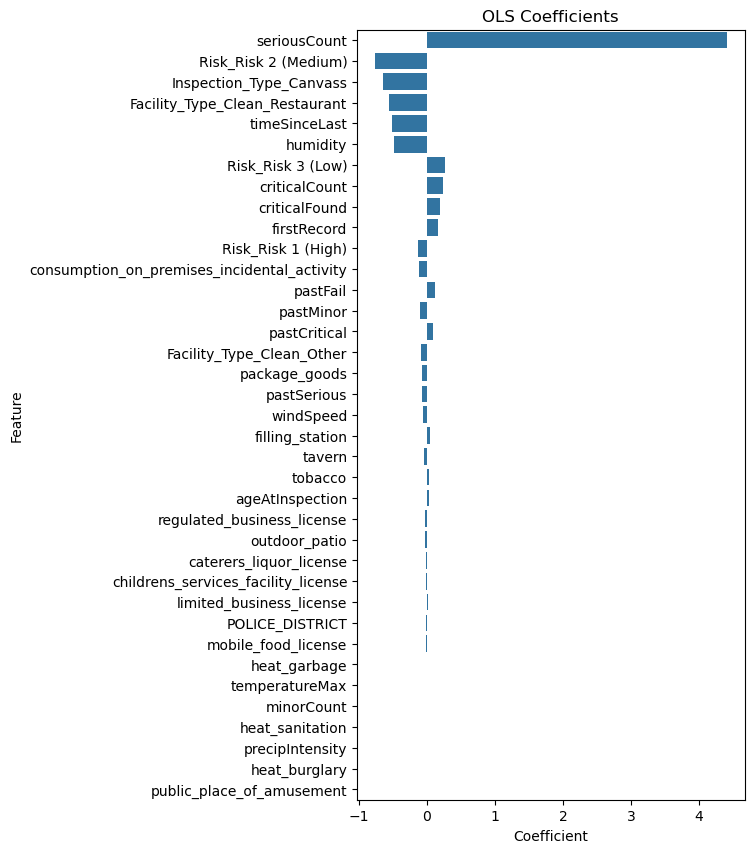

In [29]:
#copy and paste plots from above here
#OLS plot
log_reg_data = log_reg_data.reindex(log_reg_data['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(5, 10))

log_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=log_reg_data)                         

log_reg_plot.set_title("OLS Coefficients") 
#plt.xlim(-.006,.01)
plt.show() 

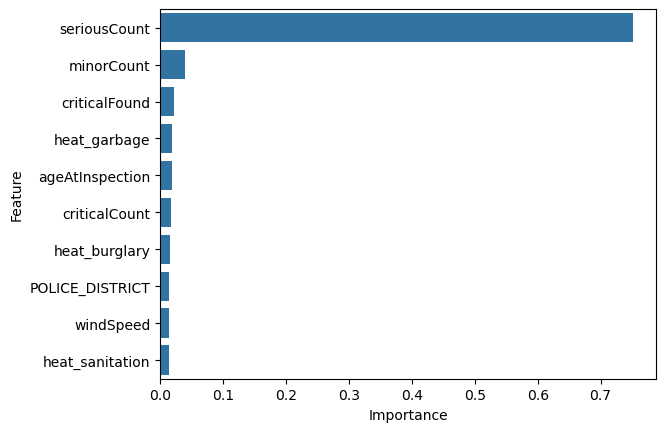

In [30]:
#RF feature importance plot
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

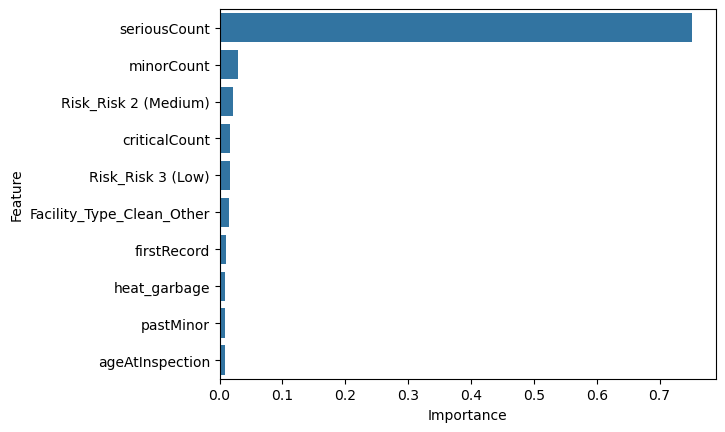

In [31]:
#XGBoost plot
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [32]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

# Predict just probabilities withg .predict_proba, using RF bc it scored the best
probs = rf_classifier.predict_proba(X)
fail_probs = probs[:, 1]  

# put these in a df and add predicted outcomes with .predict
test_results = pd.DataFrame({
    'Predicted_Outcome': rf_classifier.predict(X),
    'Fail_Prob': fail_probs
})



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [33]:
probs

array([[0.99145028, 0.00854972],
       [0.99035911, 0.00964089],
       [0.15168679, 0.84831321],
       ...,
       [0.35988185, 0.64011815],
       [0.99323988, 0.00676012],
       [0.95511962, 0.04488038]])

In [34]:
fail_probs

array([0.00854972, 0.00964089, 0.84831321, ..., 0.64011815, 0.00676012,
       0.04488038])

In [35]:
test_results

,Predicted_Outcome,Fail_Prob
0,0,0.008550
1,0,0.009641
2,1,0.848313
3,0,0.028295
4,1,0.809508
...,...,...
15306,0,0.028667
15307,0,0.005725
15308,1,0.640118
15309,0,0.006760


In [36]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

# sort
sorted_audits = test_results.sort_values(by='Fail_Prob', ascending=False)
print(sorted_audits.head(10))  # a peek

#sort by probability of detecting a fail score (1 is fail in our results variables)


       Predicted_Outcome  Fail_Prob
660                    1   0.985900
3186                   1   0.985378
2786                   1   0.984939
10267                  1   0.978528
13325                  1   0.977838
700                    1   0.976175
7210                   1   0.971969
13279                  1   0.970579
9072                   1   0.967954
7211                   1   0.966363


In [37]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

# storing top thousand in an object. 
#predicted outcome for top thousand is failure.
top = sorted_audits.iloc[:1000]

top

,Predicted_Outcome,Fail_Prob
660,1,0.985900
3186,1,0.985378
2786,1,0.984939
10267,1,0.978528
13325,1,0.977838
...,...,...
4388,1,0.837724
7620,1,0.837647
143,1,0.837543
1972,1,0.837419


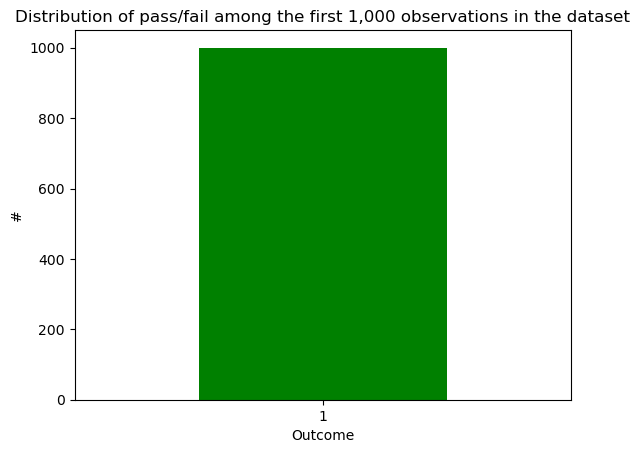

In [38]:
# pick top 1,000 observations with high probability of failure and plot your predicted outcome
top['Predicted_Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of pass/fail among the first 1,000 observations in the dataset')
plt.xlabel('Outcome')
plt.ylabel('#')
plt.xticks(rotation=0)
plt.show()



This is...not useful. I'll try plotting by probability to increase visual interest at least

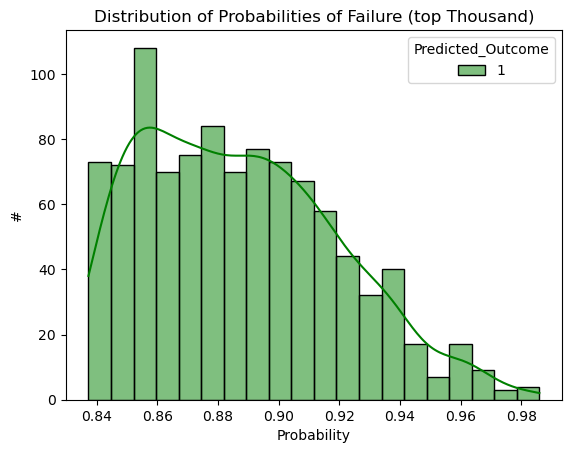

In [39]:
sns.histplot(data=top, x='Fail_Prob', hue='Predicted_Outcome', bins=20, kde=True, palette=['green', 'red'])
plt.title('Distribution of Probabilities of Failure (top Thousand)')
plt.xlabel('Probability')
plt.ylabel('#')
plt.show()

A little more useful... this is not the "distribution of pass/fail" but it's at least more interesting to look at. Quite probably I'm doing something very wrong.

In [40]:
chicago_inspections_2011_to_2013.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

#### 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [41]:
chicago_inspections_2011_to_2013.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [42]:
# making a dataset that is equivalent to the one we fit on but with the results
data = chicago_inspections_2011_to_2013

# Pulling a sample
sample = data.sample(n=1000, random_state=42)

In [43]:
#binarizing results so that it matches. 
from tabulate import tabulate
#Old
freq_table = sample['Results'].value_counts().reset_index()
freq_table.columns = ['Results Old', 'Count']
print(tabulate(freq_table, headers='keys', tablefmt='pretty'))
print (672+125)

#recode
sample['Results'] = sample['Results'].map({'Pass': 0, 'Pass w/ Conditions': 0, 'Fail': 1})

+---+--------------------+-------+
|   |    Results Old     | Count |
+---+--------------------+-------+
| 0 |        Pass        |  672  |
| 1 |        Fail        |  203  |
| 2 | Pass w/ Conditions |  125  |
+---+--------------------+-------+
797


In [44]:
#new
freq_table = sample['Results'].value_counts().reset_index()
freq_table.columns = ['Results New', 'Count']
print(tabulate(freq_table, headers='keys', tablefmt='pretty'))

+---+-------------+-------+
|   | Results New | Count |
+---+-------------+-------+
| 0 |      0      |  797  |
| 1 |      1      |  203  |
+---+-------------+-------+


In [45]:
# taking out results etc and doing get_dummies so it's all nice and parallel and python doesn't get fractious
sample_X = sample.drop(columns = ['Results','Facility_Type', 'LICENSE_DESCRIPTION','WARD_PRECINCT'])
sample_X = pd.get_dummies(sample_X)

In [46]:
sample.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [47]:
X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant'],
      dtype='object')

In [48]:
sample_X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant'],
      dtype='object')

Python got all upset that my columns were the same but I think I fixed it

In [49]:
# Predict outcome for sample
# make predictions and stick them back into the sample dataset with the actual outcome
sample['Prediction'] = rf_classifier.predict(sample_X)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [50]:
sample

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Prediction
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1277334,Aquarius Club & Restaurant,Restaurant,Risk 1 (High),Canvass,0,Restaurant,0,0,4,0,0,0,0,2.000000,1,31-4,25.0,Retail Food Establishment,8.123288,1,1,0,0,0,0,0,0,0,0,0,0,0.017333,85.460000,9.113333,0.553333,20.376028,18.461970,33.690196,0,0
670538,SUBWAY 3634,Restaurant,Risk 1 (High),Canvass,1,Restaurant,1,1,4,0,0,0,0,2.000000,1,49-17,24.0,Retail Food Establishment,5.558904,0,0,0,0,0,0,0,0,0,0,0,0,0.001813,37.966667,10.010000,0.733333,6.103809,10.314125,11.596479,1,1
598531,"MANGIA FRESCA INC.,",Restaurant,Risk 1 (High),Canvass,0,Restaurant,0,0,4,0,0,0,0,2.000000,1,11-1,9.0,Retail Food Establishment,3.024658,0,0,0,0,0,0,0,0,0,0,0,0,0.000330,37.680000,9.140000,0.743333,10.073717,5.395386,4.106813,0,0
1184324,PADDY O FEGAN'S,Restaurant,Risk 1 (High),Canvass,0,Restaurant,0,0,3,0,0,0,0,2.000000,1,27-1,12.0,Retail Food Establishment,0.827397,0,0,0,0,0,0,0,0,0,0,0,0,0.000383,74.166667,10.043333,0.406667,15.924885,4.341055,7.117970,0,0
1376178,YOLK CAFE,Restaurant,Risk 1 (High),Canvass,0,Restaurant,1,1,1,0,0,0,1,1.671233,0,42-41,18.0,Retail Food Establishment,3.380822,0,0,0,0,0,0,0,0,0,0,0,0,0.000400,23.563333,11.176667,0.730000,6.833245,0.000080,9.520084,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353567,EL CID TACOS #2,Restaurant,Risk 1 (High),Canvass,0,Restaurant,0,1,6,0,0,0,3,0.682192,0,32-7,14.0,Retail Food Establishment,4.230137,1,0,0,1,0,0,0,0,0,0,0,0,0.004313,83.940000,8.903333,0.700000,39.974764,16.857611,51.123594,0,1
1150541,ALDEN NURSING CENTER WENTWORTH,Long Term Care,Risk 1 (High),Canvass,0,Other,0,0,3,0,0,0,2,0.783562,0,6-4,7.0,Long-Term Care Facility,9.676712,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,93.283333,8.926667,0.540000,18.060858,11.511427,13.917990,0,0
1138306,BAISI THAI,Restaurant,Risk 1 (High),Canvass,0,Restaurant,0,0,8,0,0,0,0,2.000000,1,42-61,18.0,Retail Food Establishment,10.043836,1,0,0,0,0,0,0,0,0,0,0,0,0.000090,88.443333,12.930000,0.473333,21.325372,1.779204,3.932381,0,0


In [51]:
sample.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Prediction'],
      dtype='object')

In [52]:
# _Very frustrating_: because in order to do this I need to redo the dummies, but I'm being asked to predict only on a small subset of the data, 
# I'm getting the following error: 
# ValueError: The feature names should match those that were passed during fit.
# Feature names seen at fit time, yet now missing:
# - APPLICATION_TYPE_C_EXPA
# The sample just didn't happen to contain any datapoints containing that entry for Application type. I am going to see what happens if I just
# go back to the beginning and get rid of the application type variable. It isn't important in any of the models and
# I have no idea what the different application types are anyway. 

## Ok that worked

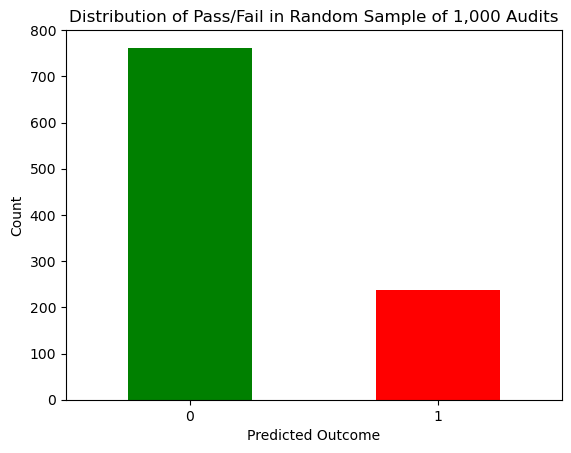

In [53]:
# Plot the distribution of predicted outcomes in the random sample
sample['Prediction'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Pass/Fail in Random Sample of 1,000 Audits')
plt.xlabel('Predicted Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

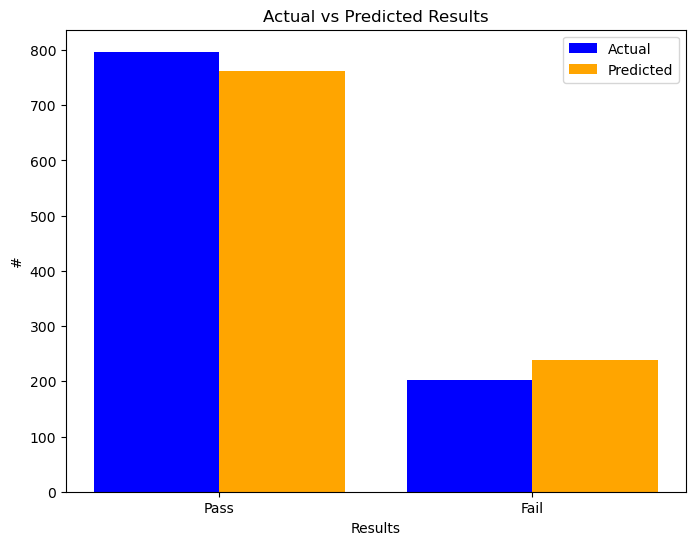

In [54]:
# compare actual to predicted
plt.figure(figsize=(8, 6))
actual = sample['Results'].value_counts()
predicted = sample['Prediction'].value_counts()

# Plot the bars for actual vs predicted
plt.bar(actual.index - 0.2, actual.values, width=0.4, label='Actual', color='blue', align='center')
plt.bar(predicted.index + 0.2, predicted.values, width=0.4, label='Predicted', color='orange', align='center')

# Add labels and title
plt.xlabel('Results')
plt.ylabel('#')
plt.title('Actual vs Predicted Results')
plt.xticks([0, 1], ['Pass', 'Fail'])
plt.legend()

# Show the plot
plt.show()


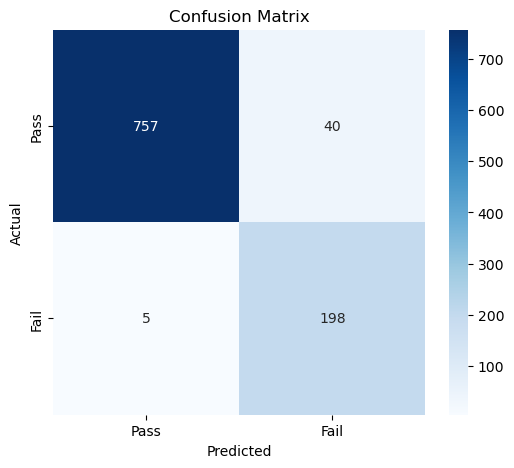

In [55]:
#confusion matrix? might be more helpful
# Looks like we did ok on the false negatives, which was my main concern
cm = confusion_matrix(sample['Results'], sample['Prediction'])

# Create a heatmap to display the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [56]:
# data processing
# -----------
# clean 2014 data: 
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                'APPLICATION_TYPE'],
                                                 inplace = True)

In [57]:
chicago_inspections_2011_to_2013.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [58]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'Facility_Type', 'Risk',
       'Inspection_Type', 'Facility_Type_Clean', 'criticalCount',
       'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_DESCRIPTION', 'minDate', 'maxDate',
       'ageAtInspection', 'consumption_on_premises_incidental_activity',
       'tobacco', 'package_goods', 'outdoor_patio',
       'public_place_of_amusement', 'limited_business_license',
       'childrens_services_facility_license', 'tavern',
       'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')

In [59]:
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [60]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [61]:
# process target 
# -----------
y_test = chicago_inspections_2014['Results']
# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test = y_test.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test = lb_style.fit_transform(y_test)

# recode 0s and 1s so 1s are "Fail"
y_test = np.where(y_test == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X_test = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X_test = pd.get_dummies(X_test)

In [62]:
X_test.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant'],
      dtype='object')

In [63]:
# predict and compare 
# using RF, which did the best 
y_pred = rf_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [64]:
# evaluate
# -----------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict class probabilities
y_prob = rf_classifier.predict_proba(X_test)
print(f"Class Probabilities for First 5 Samples: {y_prob[:5]}")

Accuracy: 0.9022098044196089
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3153
           1       0.70      0.88      0.78       784

    accuracy                           0.90      3937
   macro avg       0.84      0.90      0.86      3937
weighted avg       0.92      0.90      0.91      3937

Confusion Matrix:
[[2859  294]
 [  91  693]]
Class Probabilities for First 5 Samples: [[0.84349288 0.15650712]
 [0.96187774 0.03812226]
 [0.14014172 0.85985828]
 [0.15032855 0.84967145]
 [0.25577651 0.74422349]]


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


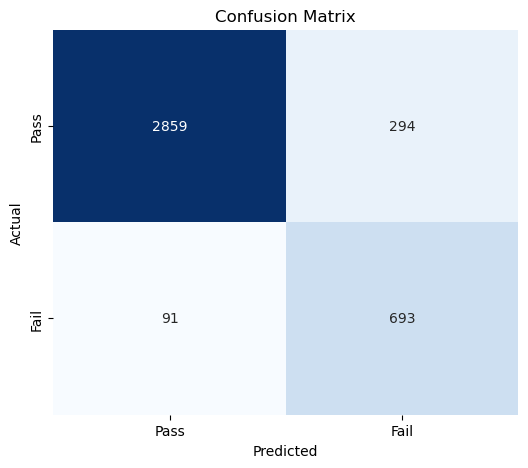

In [65]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'], cbar=False)

# Add titles etc
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


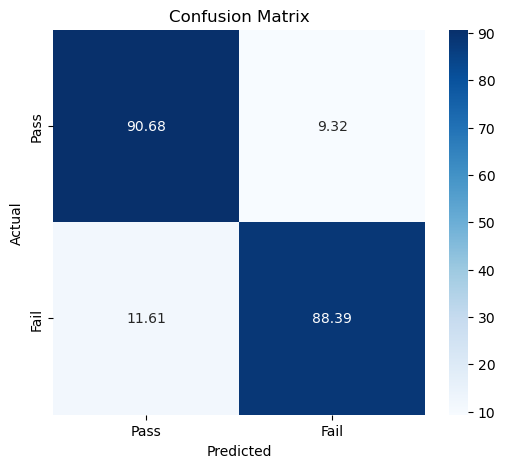

In [66]:
# as percentages?
cm = confusion_matrix(y_test, y_pred)

# Normalize
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Pass', 'Fail'], 
            yticklabels=['Pass', 'Fail'], cbar=True)

# Add titles etc
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


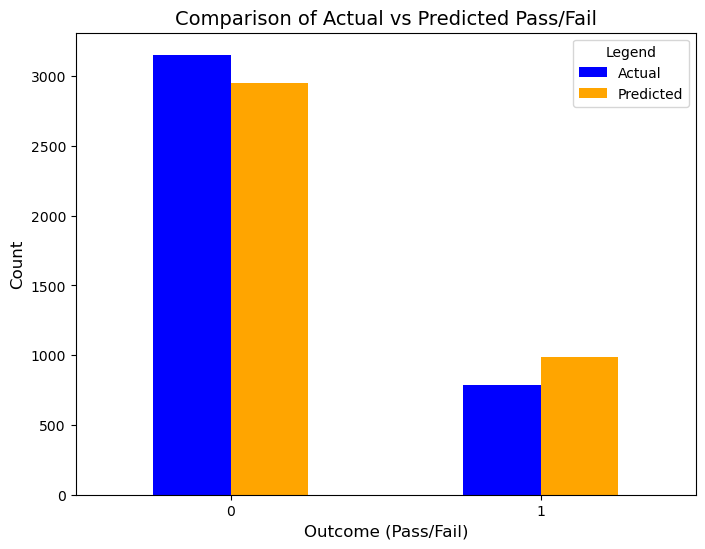

In [67]:
# Flatten arrays
y_test_flat = y_test.ravel()  # or y_test.flatten()
y_pred_flat = y_pred.ravel()  # or y_pred.flatten()

# Convert to pandas bc confused
actual_counts = pd.Series(y_test_flat).value_counts()
predicted_counts = pd.Series(y_pred_flat).value_counts()

# Dataframe
df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)  # Fill any missing values with 0 (if one class is missing)

# Plotting the bar chart
df.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])

# Add titles and labels
plt.title('Comparison of Actual vs Predicted Pass/Fail', fontsize=14)
plt.xlabel('Outcome (Pass/Fail)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.legend(title='Legend', loc='upper right', labels=['Actual', 'Predicted'])
plt.show()


I think this looks pretty good -- we're erring on the side of caution by predicting more risk than is present (recall?). 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Accuracy alone can be a misleading measure of a model’s effectiveness in social science/policy spaces. For instance, if the data has class imbalance, the model could have very high accuracy scores simply by predicting the majority class but still be a poor model in that it would fail to identify the minority class, where the actual policy intervention is often needed. In class we’ve talked about metrics like precision, recall, and AUC-ROC to solve for this. Precision and recall are also ways of measuring false positives and negatives, which are always going to be a problem when using these methods in the world of human interaction and behavior. By taking precision and recall into account, we can balance the false positive and negative rates in our understanding of the model. We’ve also talked a fair bit about fairness and equity in these models. I don’t think we’ve landed on a particular/preferred way to measure fairness but it’s going to be something we have to think about when using these models, and accuracy just won’t capture it. In the case of food inspections, my assumption was that I needed to minimize false negatives (thinking no inspection was needed when actually risk was present).

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

A few things occur: (1) retest your model; (2) figure out some way to either prevent or detect manipulation of this type; (3) randomly audit in addition to targetted auditing.

For (1), you'd essentially have to regularly audit and test the models to ensure they are still effective in identifying indicators of concern, even if establishments have started altering their behavior. Honeslty this seems like best practice to me anyway. Everything I've read about algorithmic policy decisions makes me think that continuous updating and feedback and adjustment is crucial. 

For (2), you might want to apply some non-mathematical measures, letting audittees know that you're looking for manipulated inputs and what the consequences of that might be. You could publicly share what your expectations for global input distribution are and investigate folks that fall outside of that (totally possible that that could happen for innocent reasons, but you'd want to look into how and why that's happening). 

(3) works as a kind of combination of (1) and (2) -- it would inform your model and also foster a sense that auditing can happen to anyone at any time. 